# script to graph opentuner log

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import os.path
import pandas as pd

# graph exec time vs. time in log file (--results-log-details)
def graph_log(log_name):
    data = pd.read_csv(log_name, sep=" ", names=["wallclock", "exectime"])
    plt.plot(data["wallclock"], data["exectime"], '-+', label='exec. time', linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.show()

In [10]:
# graph exec time vs. tuning time in log file (--results-log-details)
def graph_tuning(db_name):
    BASE_DIR = os.path.abspath('') # os.path.dirname(__file__) NOT ok with .ipynb
    db_path = os.path.join(BASE_DIR, db_name)
    dbase = sqlite3.connect(db_path)
    cursor = dbase.cursor()
    cursor.execute(''' 
    SELECT collection_date, time, was_new_best FROM result 
    ''')
    data = cursor.fetchall()
    tuning_times = []
    simulated_times = []
    flags = []
    base_date = parse(data[0][0])
    base_simulated_time = data[0][1]
    for row in data:
        diff = parse(row[0]) - base_date
        tuning_times.append(diff.seconds)
        if row[2] == 1:
            simulated_times.append(row[1])
            base_simulated_time = row[1]
        else:
            simulated_times.append(base_simulated_time)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(tuning_times, simulated_times, '+', label='exec. time', linewidth=1)
    plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.show()
    dbase.close()

# result of BT

In [11]:
# graph_data("calc5.bt.A.64.db")

# result of CG

In [12]:
# graph_data("calc5.cg.A.64.db")

# result of LU

In [13]:
# graph_data("calc5.lu.A.64.db")

# result of MG

In [14]:
# graph_data("calc5.mg.A.64.db")

# result of SP

In [15]:
# graph_data("calc5.sp.A.64.db")

# result of FT

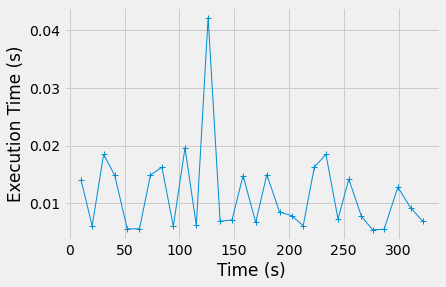

In [16]:
graph_log("ft.A.64.detail.log")